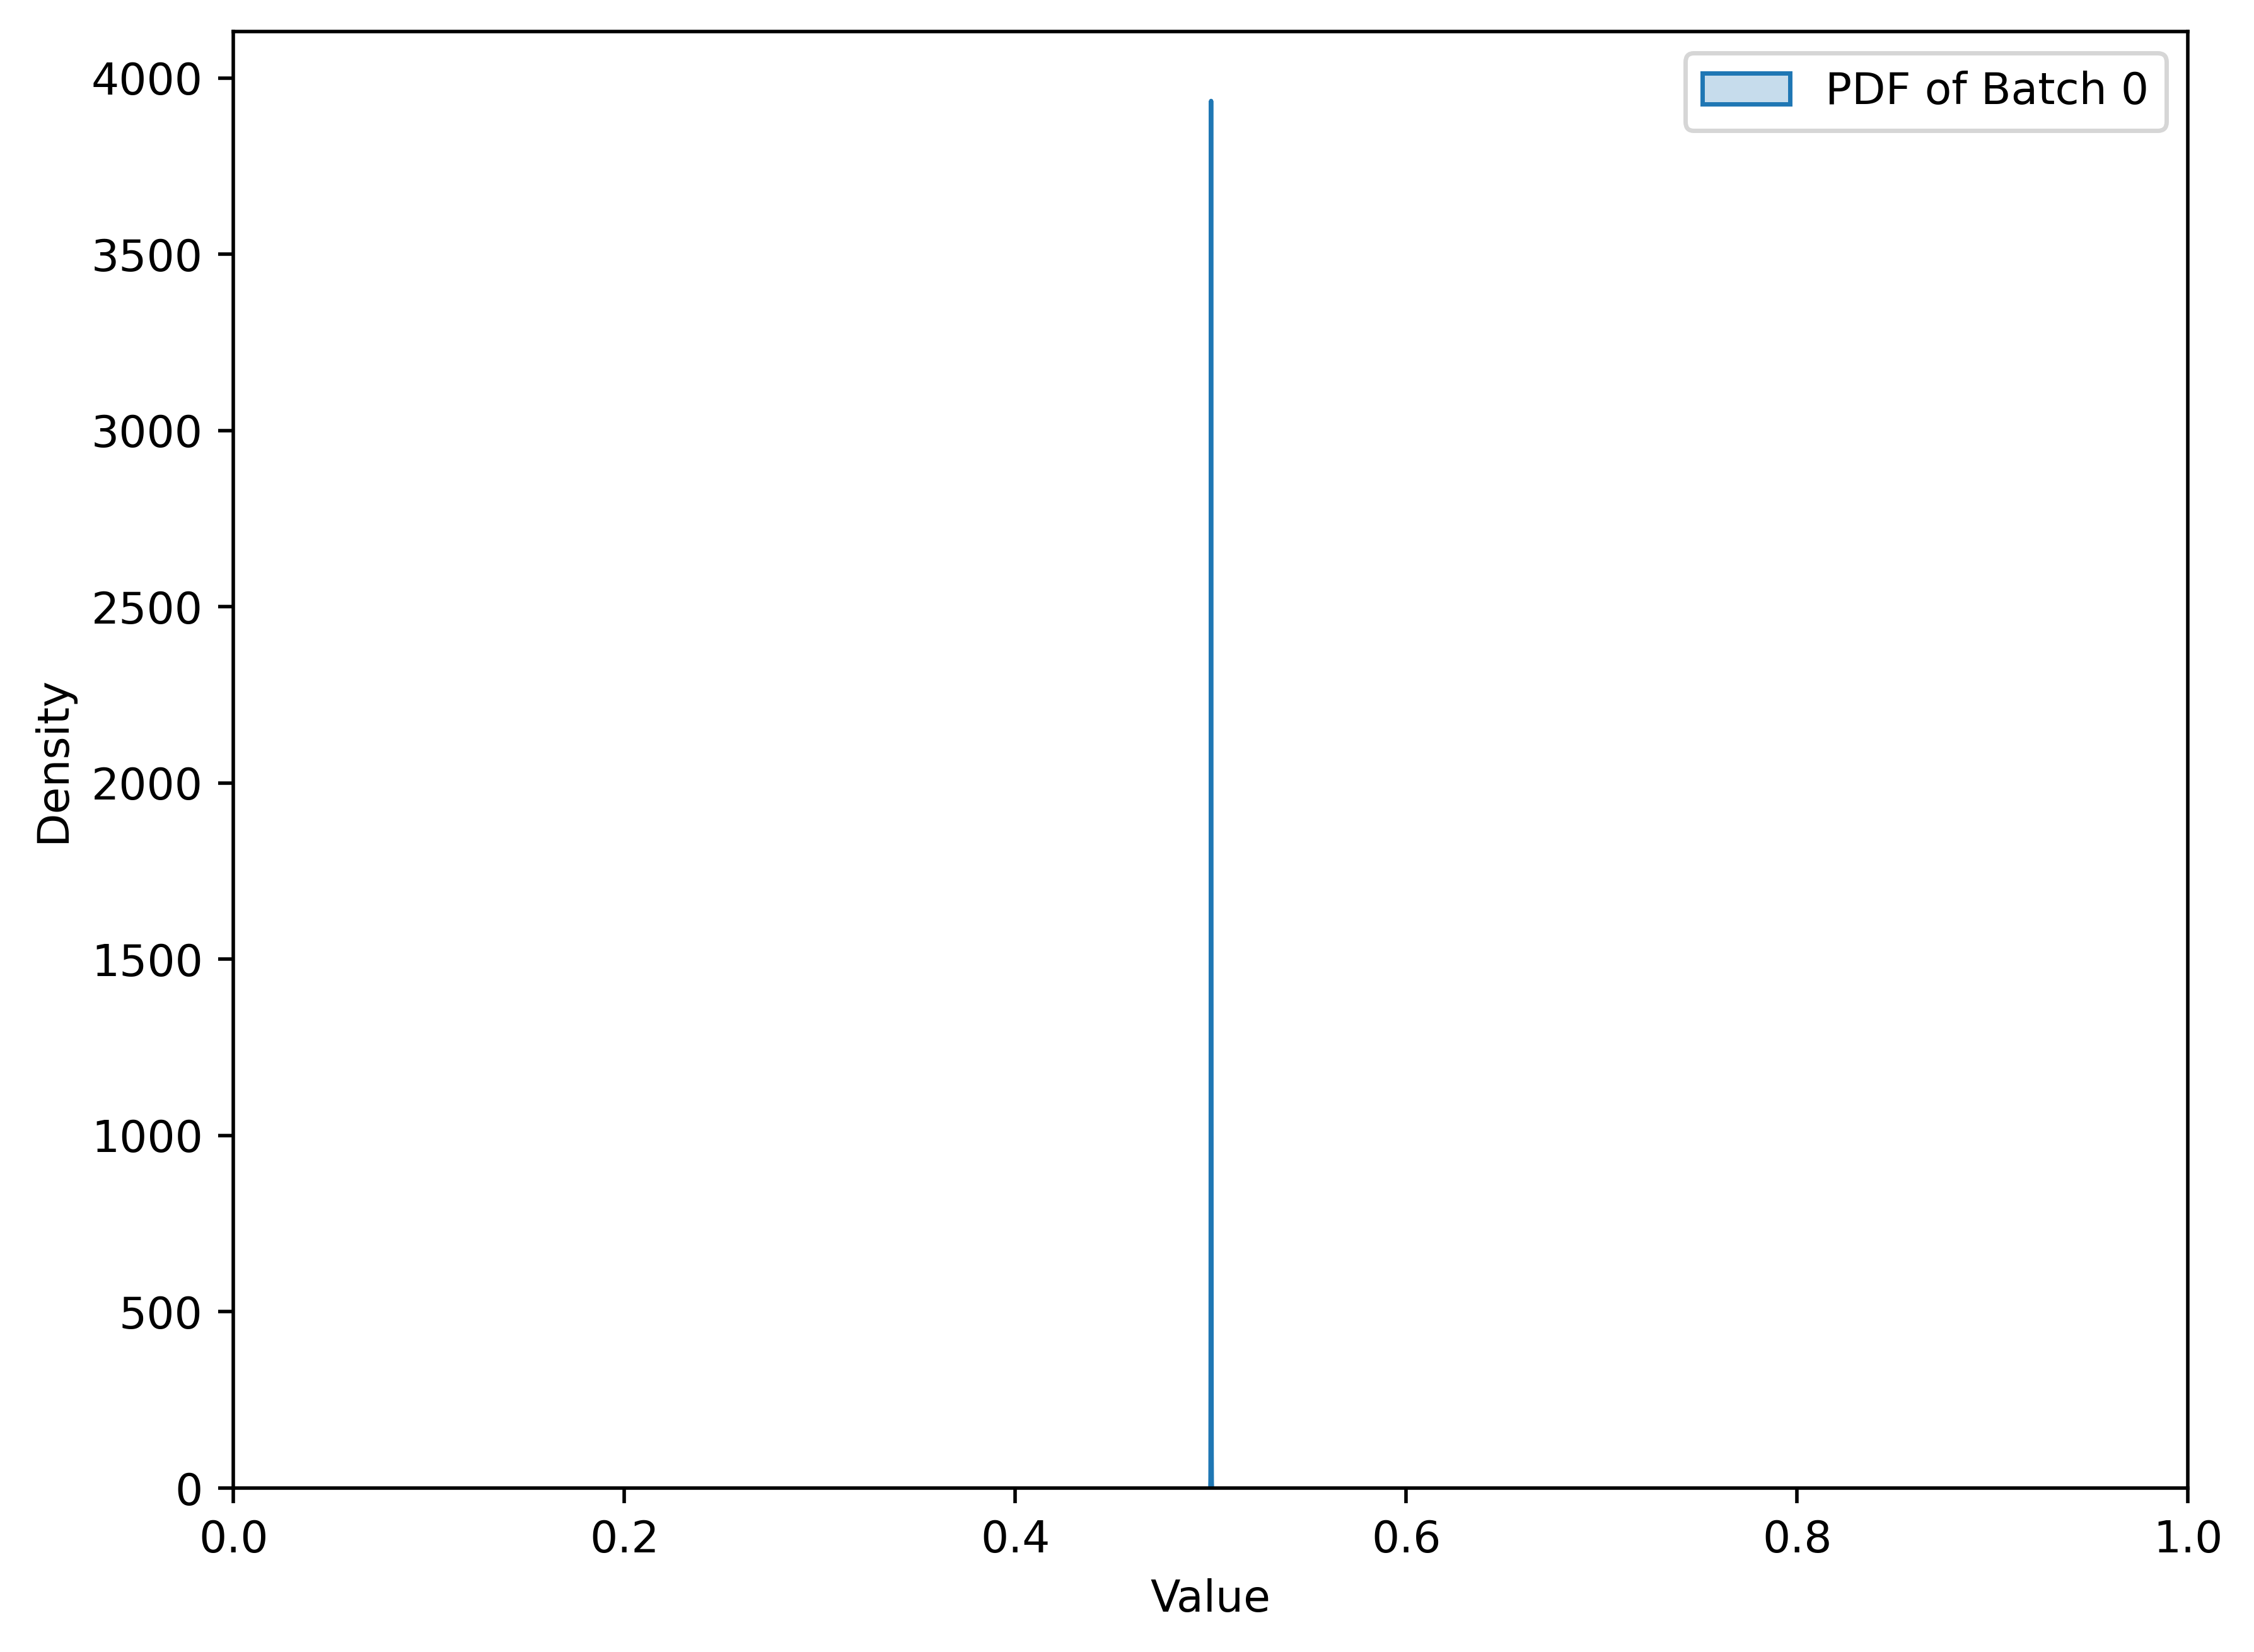

In [1]:
from vni import DEFAULT_TOLERANCE
from vni.distributions.gaussian import GaussianDistribution
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

gd = GaussianDistribution(device)

batch_size = 1

central_points = torch.tensor(
    [0.5],
    device=device,
)
variances = torch.tensor(
    [DEFAULT_TOLERANCE],
    device=device,
)

gd.set_parameters(central_points, variances)

n_samples = 10000
start = 0.0
stop = 1.0

out_distributions = gd.generate_data_from_distribution(n_samples, start, stop)
gd.plot_distribution(out_distributions)



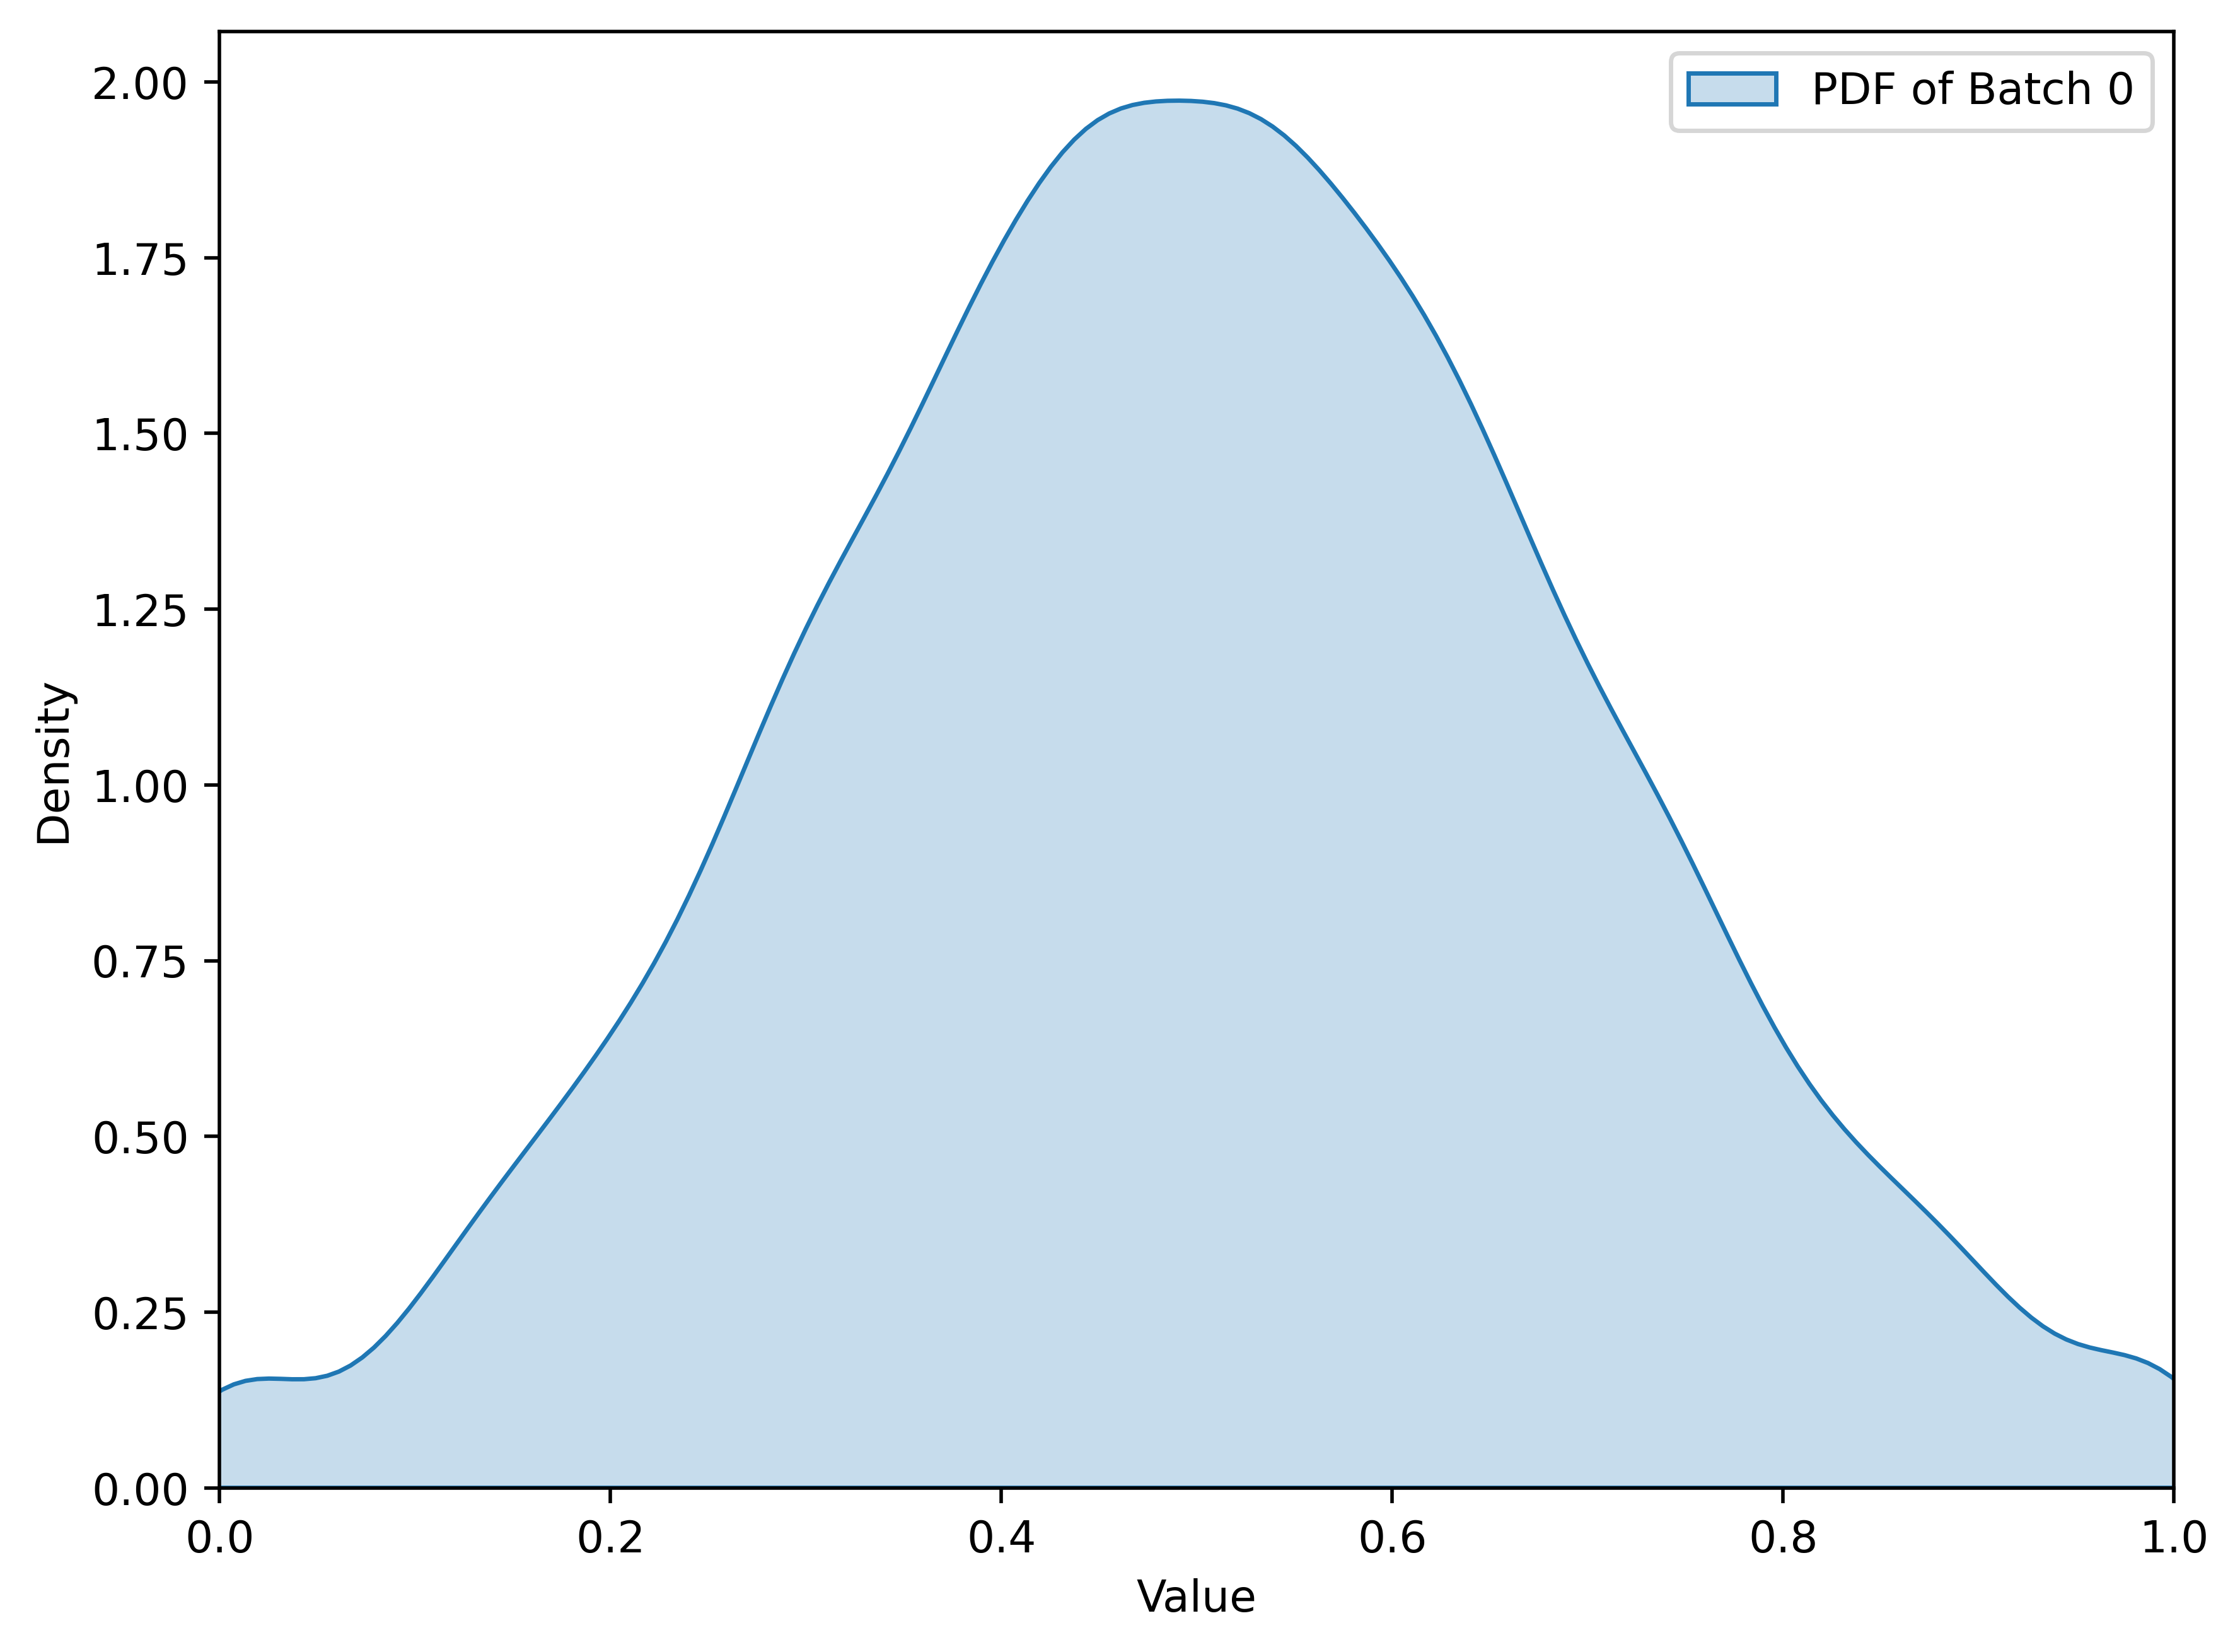

In [2]:
from vni.distributions.gaussian import GaussianDistribution
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

gd = GaussianDistribution(device)

batch_size = 1

central_points = torch.tensor(
    [0.5],
    device=device,
)
variances = torch.tensor(
    [0.04],
    device=device,
)

gd.set_parameters(central_points, variances)

n_samples = 10000
start = 0.0
stop = 1.0

out_distributions = gd.generate_data_from_distribution(n_samples, start, stop)
gd.plot_distribution(out_distributions)